# Computer Simulations

Computer simulations, also known as Monte Carlo simulations, are incredibly powerful. They allow us to compute the likely outcomes of situations or events when it would be difficult, expensive, or impossible to recreate the situations or events in the real world many times over.

As a simple example, if NASA were working on a new two-stage rocket, they would need to know, for a given launch site, where the first stage is likely to land once it detaches and falls to earth. That information would be crucial, and no launch would be allowed without it. Of course, equations using Newtonian physics and aerodynamics can be used to predict an expected spot for impact. But, obviously, the discarded stage won't hit in that exact spot every time. So, what we really want is a *distribution*, like a 2D histogram, of likely landing spots. In other words, a map of the danger zone. To construct a map of the danger zone, we could:

- Build a bunch of rockets and test-fire them into space, recording the impact coordinates of the fallen stage each time.

or

- Tinker with the constants in the equations (such as wind speed and direction at various altitudes) by hand, recording the impact coordinates predicted by the equations each time.

The second option would be incredibly tedious and would be subject to bias  (how would the exact wind directions be chosen?). The first option would expensive, time-consuming and, of course, incredibly dangerous. 

As a second example, consider forcasting the landfall of hurricanes. Here, it's obviously impossible to "test fire" a bunch of hurricanes and, even if we could, doing so would defeat the very purpose of forcasting the landfall! Very elaborate sets of equations can predict *a* landfall for a particular set of constants (ocean temperatures, prevailing winds, etc.) but, again, what we want is a *distribution* of likely locations for landfall – a map of the danger zone.

In each of these situations, the solution is to run the equations on a computer – that is, to do a simulations – many many times over and, each time, having the computer select probable values for the constants (air temperature etc.) *at random*. Having the values for the constants be set to new random values each time will make the final outcome – impact site, landfall location, etc. – also vary, and the final distribution of these outcomes will give us the information we want. 

Simulations are now ubiquitous in data science. They are, in fact, used in hurricane forcasting as well as in any other area in which people make predictions, such as sports, politics, and warfare (the first use of computer simulations was to help develop the first nuclear weapon). The key to doing computer simulations, however, is to be able to pump realistic *random* values into the equations on each simulation, so that the variability in these values plays out as realistic variability in the final outcome. So where do we get these random numbers?

## Pseudorandom Numbers

A computer is a deterministic machine meaning that, in any given state, it will always produce the same output for a given input. So how can a computer possibly produce random numbers? It can't. But it can produce ***pseudorandom numbers***, which are sequences of numbers that are random *for all practical intents and purposes*.

Pseudorandom numbers are so widely used and so good (that is, statistically indistinguishable from true random numbers) that most books and articles nowadays just refer to them as "random numbers". Similarly, the algorithms and programs used to generate them are called "random number generators" rather than "pseudorandom number generators".

The way computers make random numbers is conceptually quite simple. A starting value – a "seed" – is passed through an algorithm that produces a single output value, the first "random" number. This output is passed back though the algorithm to produce the second random number, and so on. The trick is to design an algorithm that makes it almost impossible to guess the input value from the output value. In other words, the numbers should appear to be unrelated or *independent*, and therefore random.

Here is a very simple algorithm for a (pseudo) random number generator. It takes three numbers:

- a number, *s*, the "seed"
- a number, *a*, called the "multiplier"
- and a number, *m*, called the "modulus"

It then computes the remainder – the modulus – of: $(seed * a) / m$

That equation yields our first random number. To get the second number, we feed the first output back into the equation in place of the seed. To get the third, we feed in the second and so on.

Here is code to implement the above algorithm – an actual (psuedo) random number generator!

In [2]:
s, a, m = 1, 10, 23  # seed, multiplier, modulus
ps_rands = []         # empty list to hold our numbers

for i in range(20) :
    if i > 0 :
        x = (ps_rands[i-1]*a)%m
        ps_rands.append(x)
    else :
        x = (s*a)%m
        ps_rands.append(x)
        
ps_rands

[10, 8, 11, 18, 19, 6, 14, 2, 20, 16, 22, 13, 15, 12, 5, 4, 17, 9, 21, 3]

Run the code and see if you can find a pattern in these numbers! If you can't, then they pass at least one informal test of randomness – the test of you!

---

Re-run the above code with various values for the seed. What happens?

---

Playing with the above code hopefully made you realize that this simple random number generator is actually not a good one. But it's also quite simple, so we got what we paid for!

A moment's thought should convince us that, if a random number generator outputs a number, say a 5, that it has already generated, then the sequence between the first and second 5 will just keep repeating. It has to, because the algorithm will always generate the same output for a given input! And sequences of numbers that repeat are not random! So one of the keys to good random number generators is to have them yield number sequences that go on for a very very very long while before they start repeating.

Modern random number generators are quite good; we don't need to worry about them, we just need to use them. Importantly, however, they are still algorithms, which means that given the same starting point – the seed – they will always produce the same sequence of numbers. This is a feature not a bug! It means that as long as we know our seed, we can always reproduce our analyses!

> Note: Modern computer operating systems are gathering true random numbers all the time, like the timing between your keyboard strokes, mouse movements, communications between the CPU and hard disk, and even the small fluctuations in noise around the computer! It uses these random numbers to encrypt your data and communications. 

> If you use numpy to generate random numbers without specifing a seed, numpy will dip into the random numbers used by your computer's OS. But then, of course, you won't know what your seed was and won't be able to reproduce your analysis!

## Preliminaries

In order to actually do simulations, we are going to be using the random number generating capabilities of numpy, so let's import it as usual. We're also going to want to make some histograms, so let's import Seaborn as well.

In [3]:
import numpy as np
import seaborn as sns

And run this command to make sure our plots show up.

In [4]:
%matplotlib inline    

## Using numpy's random number generator

The prefered method for getting random numbers using numpy is a two-step process. The process is:

1. Create a random number generator object at the start of a script or simulation
2. Use that random number generator to draw samples from you desired distribution

Here's how we create a random number generator with a seed of 42:

In [5]:
rng = np.random.default_rng(42) # seed with the answer to the ultimate question

We're allowed to name our generator whatever we want, but it's convention to name these generators "rng" unless there is a good reason to do otherwise. 

We can now use this generator throughout a given project or project phase. If we wanted a number from a normal distribution, for example, we would call the `rng.normal()` method.

---

In the cell below, call `rng.normal()` 10 or so times, and see what you get.

In [6]:
rng.normal()

0.30471707975443135

Is that about what you would expect? Why?

---

As always, we can use `rng.<tab>` to see what methods (statistical distributions in this case) are available. We can then use the help (e.g. `help(rng.normal`) to get help for that particular method.

---

In the cell below, get 100 samples from the Student's *t* distribution with 41 degrees of freedom, and plot (e.g. histogram) the resulting distribution.

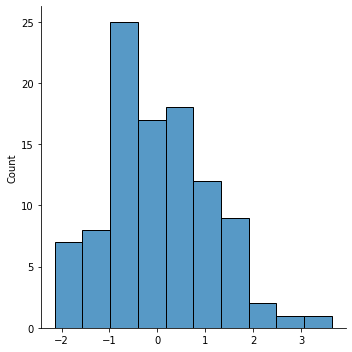

In [12]:
sns.displot(rng.standard_t(41, 100))

Re-run the above a few times. Do the distributions look reasonable for a *t* distribution with *df* > 30?

---

## Simple simulations

The very idea of simulating something complicated can seem daunting if not impossible at first. How would we simulate something as complicated as a soccer game or traffic on a social media platform? Where would we even start? To get the idea of simulations, let's start by simulating a couple of very simple situations, coin flips and rolls of the dice.

### Coin Flips

A coin flip is probably the simplest physical situation we could simulate, so that's a great place to start. Any event that has to have one of two outcomes is known as a "Bernoulli trial" (after a famous mathematicion Daniel Bernoulli). This includes coin flips, answers to yes/no questions, consumer "to buy or not to buy" decisions, voting behavior, etc. 

Generally, we are interested in the sum of the results of many Bernoulli trials – for example, it is the total number of people that voted for canditate A (vs. candidate B) that determines the winner of an election.  A single set of Bernolli trials is called an "experiment". The outcome of such experiments, the sum of some number of Bernolli trials, has a *binomial* distribution. Thus, such simulations are done using the `rng.binomial()` method.

The binomial distribution has two parameters, 

- the number of trials (e.g. the number of people voting in an election), and 
- the probability of one of the outcomes occuring on a single trial.

(note that only one probability is needed, because the probability of the second is 1 minus the probability of the first) 

In terms of a coin, this translates to the number of times we flip a coin, and the probability that our coin comes up "heads" on any one trial.

#### A Fair Coin

First, let's reset our random number generator, `rng`, with a seed of 42 so everybody gets the same output.

---

Reset `rng` with a seed of 42 below:

In [13]:
rng = np.random.default_rng(42)

---

And now let's simulate a fair coin or, more precisely, an experiment on a fair coin.

---

In the cell below, use `rng.binomial()` to do a simulation giving the number of heads resulting from a fair coin being flipped 10 times:

In [18]:
rng.binomial(10, 0.5)

3

Because we reset our random number generator, you should have gotten a 6. Run the above code a few more times, noting the numbers.

Now reset the generator to a seed of 42 again:

In [5]:
rng = np.random.default_rng(42)

And get a new sequence of number-of-heads for 10 flips of a fair coin to confirm you get the same sequence. 

Now reset the seed to something else, and run a few more binomial experiments.

You should see a different sequence of numbers because you used a different seed.

---

##### *Simulating Many Experiments*

Simulating one experiment or event isn't very helpful in and of itself. Just because a single simulation said we'll get 6 out 10 heads doesn't mean we'll get that if we really do the coin flips!

The advantage of computer simulations is that they let us easily and rapidly compute the outcome of thousands or even millions of experiments in order to compute the *distribution* of likely outcomes – the "danger zone" in the rocket and hurricane examples.

You might be thinking "time for a `for` loop!" right now. Great! The `for` loop is used quite a bit in doing simulations! In this case, however, the `rng.binomial()` method takes an optional 3rd argument, which is the number of experiments to run. (The fact that it has this third argument is a clue that was written with simulations in mind!)

---

In the cell below, take advatage of of this third argument to simulate 100000 experiments, each consisting of 10 flips of a fair coin. Assign the output to the name `n_heads` (i.e. `n_heads = rng.binomial...`).

In [22]:
rng = np.random.default_rng(42) # reset the genny
n, p = 10, .5  # number of trials, probability of a head on each trial
n_exp = 100000   # number of experiments to simulate

In [23]:
n_heads = rng.binomial(n, p, n_exp)

---

In the cell below, make a histogram of the outcomes, `n_heads`, from our 100000 experiments. For best results, set the binwidth to 1 and make the x-axis go from 0 to 10.

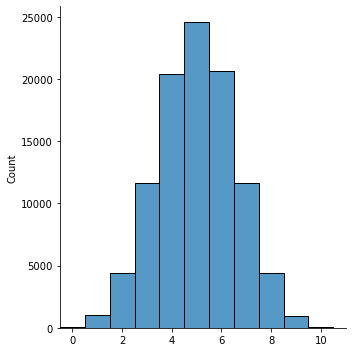

In [24]:
my_hist = sns.displot(n_heads, kind = 'hist', binwidth = 1, binrange = (-0.5,10.5))
my_hist.set(xlim = (-0.5,11))

Based upon this histogram, if somebody flipped a coin 10 times and came up with 2 heads, would you suspect that person of cheating? Why or why not?

What about 10 heads?

---

#### An Unfair Coin

Perhaps surprisingly, it's almost impossible to make a biased coin because they are so thin relative to the size of their sides. However, we *can* easily simulate a biased coin so we would know what to look for if anyone did figure out how to make one.

---

Use the cell below to simulate the same experiment as above, but using a coin that lands on heads 75% of the time on average.

In [25]:
p = 0.75
n_heads = rng.binomial(n, p, n_exp)

Now make a histogram of the outcomes (for the rest of the notebook, we'll just take it for granted that we'll be making histograms of our outputs).

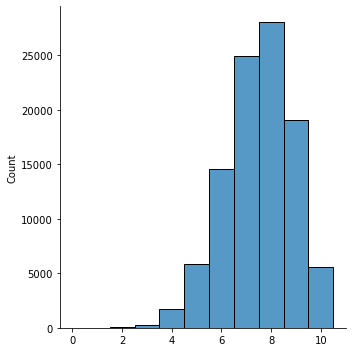

In [26]:
my_hist = sns.displot(n_heads, kind = 'hist', binwidth = 1, binrange = (-0.5,10.5))
my_hist.set(xlim = (-0.5,11))

How did it change the distribution? Did the mean shift? Did the shape change?

---

## Simulating Elections

Armed with nothing more than our ability to model coinflips, we can also simulate a surprising amount of other things, such as elections. Literally anything that can be reduced to a series to two-alternitave choices can be simulated using the binomial distribution.

Let's say there is an upcoming election in which one million people were expected to vote, and candidate "A" is leading in the polls at 52% vs. 48%. Here is a simple simulation of this election – the number of votes for candidate A – assuming the polling is accurate.

In [33]:
rng.binomial(1000001, .52)

520470

---

Re-run the above simulation until you think you have a good idea of how often the underdog – poor candidate B – is likely to win.

Now, in the cell below, change the simulation so that there are only 11 voters – like perhaps a soccer team is chosing between two potential captains, and only the starters get to vote. Run the simulation until you get again get a feel for how often the underdog prevails.

In [36]:
rng.binomial(11, .52)

5

In the cell below, offer an explanation of why, with the same p = 0.52, the underdog prevails more in once case than another.

---

### Simulating election results based on a single poll

Above, we simulated one election at a time but, as with the coins, we really want to do many many experiments so that we can see the distribution of likely election outcomes.

#### *single poll, many elections*

In [38]:
poll_ps = np.array([52, 48])
poll_ps = poll_ps / 100

In [37]:
poll_ps

array([0.52, 0.48])

In [30]:
n_voters = 10000 # smallish city - expect around 10k voter turnout
n_sims = 20000   # number of simulations to run

In [38]:
elec_results = my_rng.binomial(n_voters, poll_ps[0], n_sims)

In [39]:
elec_results[0:10]

array([5171, 5251, 5184, 5236, 5190, 5201, 5295, 5178, 5254, 5296])

In [ ]:
sns.displot(elec_results)

#### *simulate poll -> simulate election*

Notice that we did not incorporate the sample size of the poll and the potential poll-to-poll variability...

In [42]:
samp_sz = 2000
poll_results = rng.binomial(samp_sz, poll_ps[0], n_sims)
multi_poll_ps = poll_results/samp_sz

elec_results = rng.binomial(n_voters, multi_poll_ps, n_sims)


In [ ]:
sns.displot(elec_results)